Week 4: Clustering 

Exercise 18: ...

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load and reshape position data
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1, pos_flat.shape[1] // 2, 2)

class DistanceMoments:
    
    def __init__(self, color='C4'):
        self.xwidth = 1
        self.color = color
        self.bin_centers = range(2)
    
    # Calculate mean and standard deviation of pairwise distances
    def descriptor(self, pos):
        all_distances = pdist(pos)
        mean = np.mean(all_distances)
        std = np.std(all_distances)
        return np.array([mean, std])
    
    # Draw both the atom configuration and the bar plot of mean and std dev
    def draw(self, pos, ax, ax2):
        # Bar plot of mean and std dev
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers, vector, width=0.8 * self.xwidth, color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0, 2.3])
        
        xticklabels = ['mu', 'sigma']
        ax.set_xticks(range(len(xticklabels)))
        ax.set_xticklabels(xticklabels)
        ax.set_title(self.__class__.__name__)
        
        # Scatter plot of atom positions (atom configuration)
        ax2.scatter(pos[:, 0], pos[:, 1], color='blue', s=200, label="Atoms")
        ax2.set_title("Atom Configuration")
        ax2.set_xlabel("X")
        ax2.set_ylabel("Y")
        ax2.set_aspect('equal')
        ax2.grid(True)


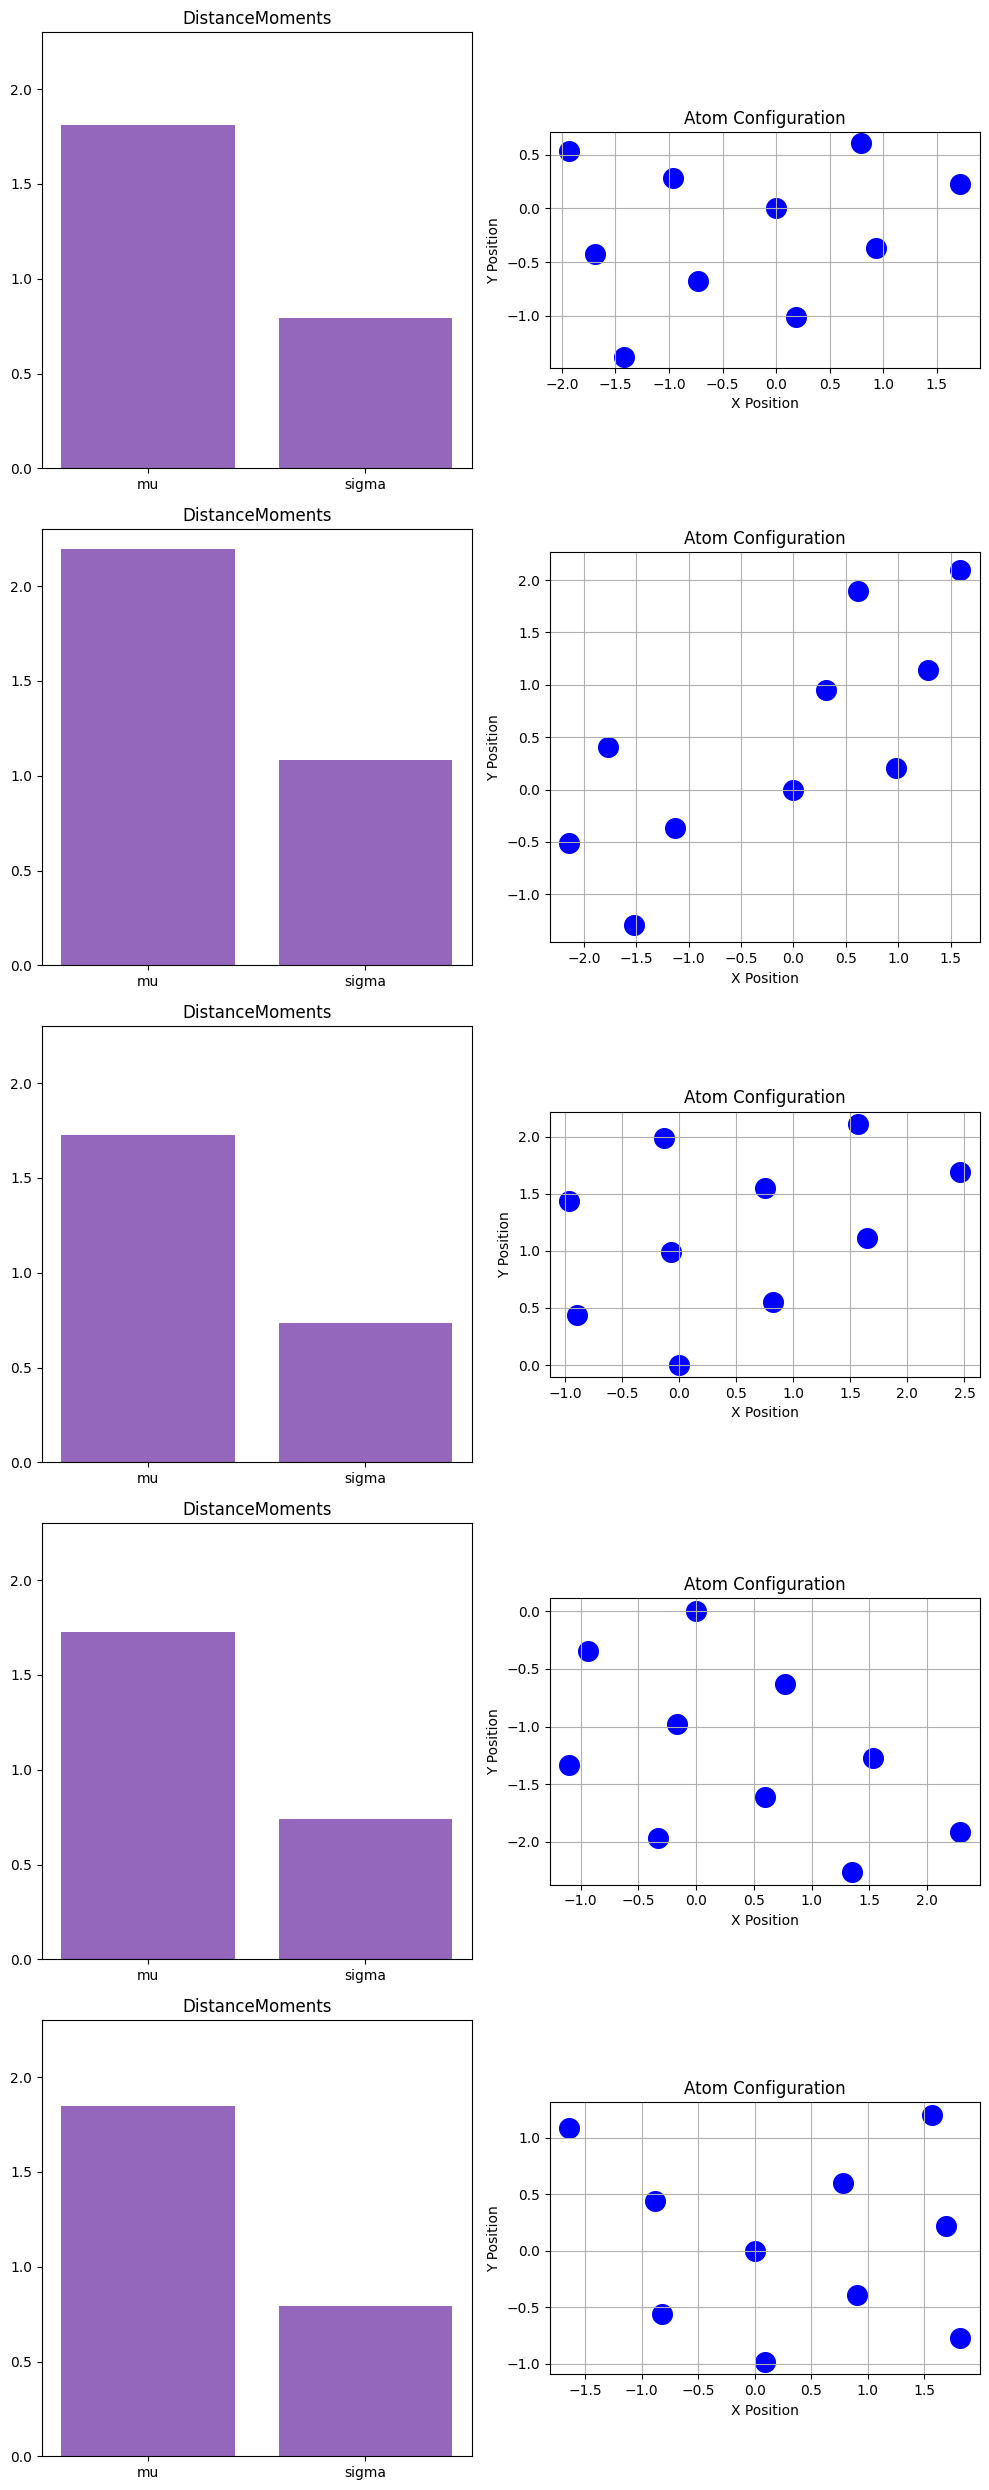

In [24]:
distance_moments = DistanceMoments()

# Number of clusters to plot
#n_clusters = positions.shape[0]
n_clusters = 5

n_cols = 2  # Each cluster will use two columns (one for the bar chart and one for the scatter plot)
n_rows = n_clusters  # Number of clusters

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_clusters))

for i in range(n_clusters):
    ax_bar = axes[i, 0]  
    ax_scatter = axes[i, 1]  
    distance_moments.draw(positions[i], ax_bar, ax_scatter)

plt.tight_layout()
plt.show() 

4.4 Descriptor space: plot the 38 clusters in (mu,sigma)-coordinate system.

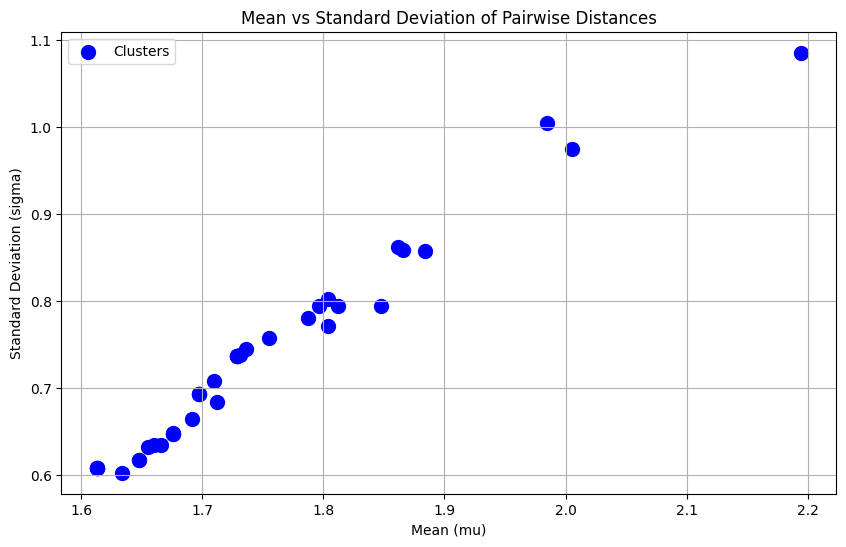

In [37]:
distance_moments = DistanceMoments()

mu_values = []
sigma_values = []

# Loop through each cluster and compute mu and sigma
for pos in positions:
    mu, sigma = distance_moments.descriptor(pos)
    mu_values.append(mu)
    sigma_values.append(sigma)

# Plot mu vs sigma
plt.figure(figsize=(10, 6))
plt.scatter(mu_values, sigma_values, color='blue', s=100, label='Clusters')
plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Mean vs Standard Deviation of Pairwise Distances')
plt.grid(True)
plt.legend()
plt.show()
